# 훈련 세트의 일부로 간주되는 쿠폰 목록
### coupon_list_test - 310 개의 쿠폰
```
CAPSULE_TEXT : Capsule text	 (?)	 
GENRE_NAME : 쿠폰의 Category 이름	 	 	 
PRICE_RATE : 할인률		 	 	 	 
CATALOG_PRICE :	리스트 가격(상품 원가인듯) 	 	 	 
DISCOUNT_PRICE : 할인 가격	
DISPFROM : 상품 출시일		 	 	 	 	 	 
DISPEND	: 할인 마감일
DISPPERIOD : 할인 일수
VALIDFROM :	유효기간 시작일	 	 	 	 	 	 
VALIDEND : 유효기간 마감일
VALIDPERIOD	: 유효기간(일수)
USABLE_DATE_MON	: 요일별 사용가능 (0, 1)
USABLE_DATE_TUE	 	 	 	 	 
USABLE_DATE_WED	 	 	 
USABLE_DATE_THU	 	 	 
USABLE_DATE_FRI		 	 	 	 	 
USABLE_DATE_SAT 	 	 	 	 
USABLE_DATE_SUN
USABLE_DATE_HOLIDAY : 공휴일 사용가능
USABLE_DATE_BEFORE_HOLIDAY : 공휴일 전날 사용가능
large_area_name	: 상점 위치의 큰 지역 이름
ken_name : 상점 이름 
small_area_name : 상점 위치의 작은 지역 이름
COUPON_ID_hash : Coupon ID
```

In [5]:
pd.set_option('display.max_columns', None)
df_train_coupon_list_train = pd.read_csv('../data/coupon_list_train.csv')
df_train_coupon_list_train.tail()

,CAPSULE_TEXT,GENRE_NAME,PRICE_RATE,CATALOG_PRICE,DISCOUNT_PRICE,DISPFROM,DISPEND,DISPPERIOD,VALIDFROM,VALIDEND,VALIDPERIOD,USABLE_DATE_MON,USABLE_DATE_TUE,USABLE_DATE_WED,USABLE_DATE_THU,USABLE_DATE_FRI,USABLE_DATE_SAT,USABLE_DATE_SUN,USABLE_DATE_HOLIDAY,USABLE_DATE_BEFORE_HOLIDAY,large_area_name,ken_name,small_area_name,COUPON_ID_hash
19408,ネイル・アイ,ネイル・アイ,65,10000,3500,2011-07-14 12:00:00,2011-07-17 12:00:00,3,2011-07-18,2011-12-30,165.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,北信越,新潟県,新潟,fe334f1a5e0dc54eca76b9dd9559661b
19409,グルメ,グルメ,50,5980,2990,2011-09-30 12:00:00,2011-10-03 12:00:00,3,2011-10-04,2012-02-29,148.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,関東,東京都,新宿・高田馬場・中野・吉祥寺,8dc11b257cb1c5b98e7b7c66d9b2b779
19410,グルメ,グルメ,50,6300,3150,2011-09-03 12:00:00,2011-09-05 12:00:00,2,2011-09-06,2011-11-30,85.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,2.0,関東,東京都,渋谷・青山・自由が丘,b15e2d7619c3fd9c6be567c971bdf4f4
19411,グルメ,グルメ,50,2400,1200,2011-07-15 12:00:00,2011-07-17 12:00:00,2,2011-07-18,2011-10-31,105.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,関東,東京都,銀座・新橋・東京・上野,e1141a4b2798450f36e40090659c0b07
19412,グルメ,グルメ,60,6000,2400,2011-07-23 12:00:00,2011-07-26 12:00:00,3,2011-07-27,2011-11-30,126.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,関東,東京都,新宿・高田馬場・中野・吉祥寺,79303de03e3af7105cded55960d62ac3


In [6]:
print('COUPON_ID_hash' ,':', len(df_train_coupon_list_train.groupby('COUPON_ID_hash').count()))
print('CAPSULE_TEXT' ,':', len(df_train_coupon_list_train.groupby('CAPSULE_TEXT').count()))
print('GENRE_NAME' ,':', len(df_train_coupon_list_train.groupby('GENRE_NAME').count()))
print('large_area_name' ,':', len(df_train_coupon_list_train.groupby('large_area_name').count()))
print('ken_name' ,':', len(df_train_coupon_list_train.groupby('ken_name').count()))
print('small_area_name' ,':', len(df_train_coupon_list_train.groupby('small_area_name').count()))



COUPON_ID_hash : 19413
CAPSULE_TEXT : 25
GENRE_NAME : 13
large_area_name : 9
ken_name : 47
small_area_name : 55


In [7]:
% matplotlib inline
import matplotlib
## matplotlib 한글사용
from matplotlib import rc
rc('font', family='AppleGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(17,6))
def show_bar(df,col_name):
    plt.figure(figsize=(20,6))
    df2 = pd.DataFrame(df[col_name])
    counts = df2.groupby([col_name]).size().reset_index(name='Counts')
    print(counts)
    y = counts['Counts']
    x = counts[col_name]
    plt.bar(x, y)
    plt.show()
col_name = ['CAPSULE_TEXT', 'GENRE_NAME','CATALOG_PRICE','PRICE_RATE','USABLE_DATE_MON', 'USABLE_DATE_TUE',
       'USABLE_DATE_WED', 'USABLE_DATE_THU', 'USABLE_DATE_FRI',
       'USABLE_DATE_SAT', 'USABLE_DATE_SUN', 'USABLE_DATE_HOLIDAY',
       'USABLE_DATE_BEFORE_HOLIDAY', 'large_area_name', 'ken_name',
       'small_area_name',]

   CAPSULE_TEXT  Counts
0       WEBサービス      42
1           その他     827
2          イベント       4
3           エステ     758
4        ギフトカード     104
5           グルメ    3658
6        ゲストハウス      13
7        ネイル・アイ     626
8         ビューティ       1
9        ビューティー      42
10        ヘアサロン    1436
11        ペンション     103
12          ホテル    1943
13     リラクゼーション    1089
14         レジャー     664
15         レッスン     673
16          ロッジ      24
17        健康・医療      55
18         公共の宿       9
19           宅配    5841
20           旅館    1351
21           民宿      99
22          貸別荘      28
23         通信講座      12
24       通学レッスン      11


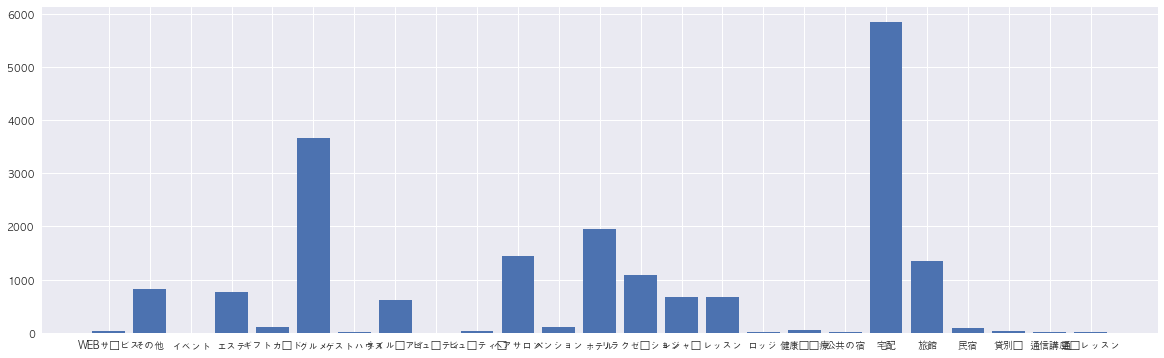

   GENRE_NAME  Counts
0    その他のクーポン     873
1         エステ     758
2      ギフトカード     104
3         グルメ    3658
4      ネイル・アイ     626
5      ビューティー      43
6       ヘアサロン    1436
7      ホテル・旅館    3570
8    リラクゼーション    1089
9        レジャー     664
10       レッスン     696
11      健康・医療      55
12         宅配    5841


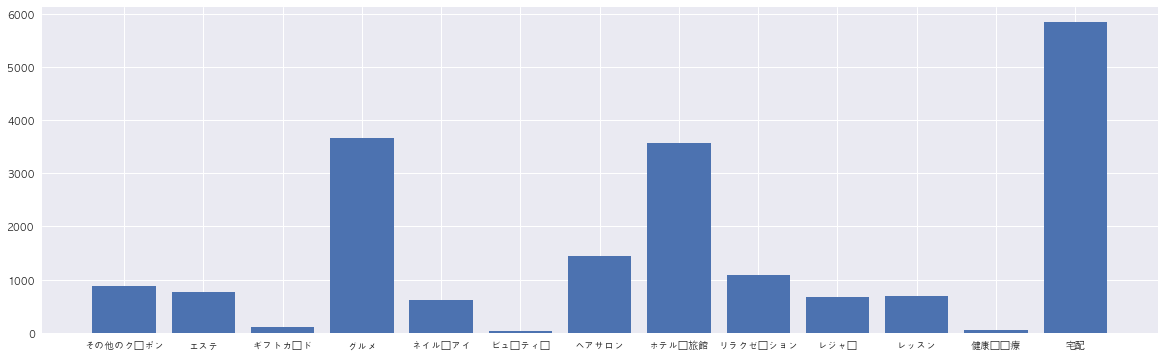

      CATALOG_PRICE  Counts
0                 1       8
1               300       1
2               320       1
3               350       2
4               380       1
5               400       1
6               450       2
7               500      37
8               510       1
9               525       1
10              530       3
11              550       3
12              570       1
13              580       3
14              600      14
15              650       5
16              660       1
17              680       2
18              700       9
19              720       2
20              730       1
21              750      10
22              760       1
23              780       1
24              790       1
25              800      28
26              840       3
27              850       4
28              872       1
29              880       4
...             ...     ...
2385         111300       1
2386         111825       1
2387         112500       1
2388         120000 

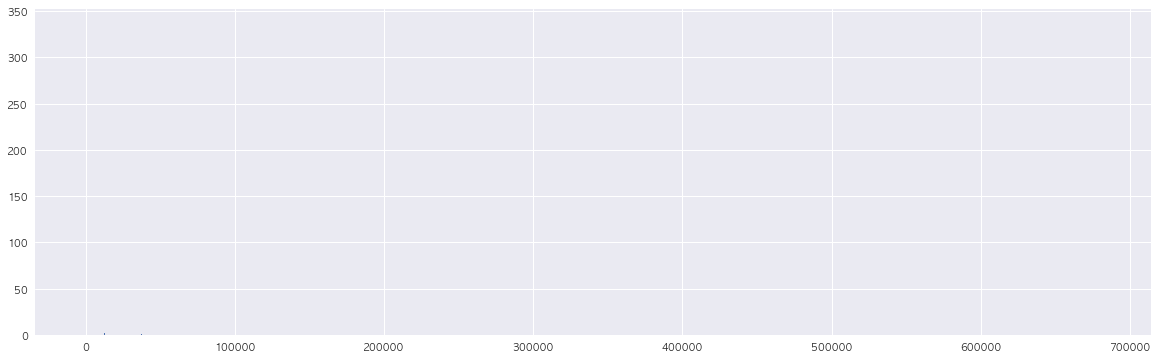

    PRICE_RATE  Counts
0            0      23
1            3       1
2           11       3
3           16       1
4           20       1
5           30      43
6           31       5
7           32       1
8           33       6
9           34       2
10          35       5
11          36       1
12          37       2
13          38       3
14          39       1
15          40      10
16          42       4
17          43       4
18          44       4
19          45       2
20          46       2
21          49       2
22          50    7622
23          51     716
24          52     892
25          53     535
26          54     502
27          55     506
28          56     469
29          57     409
..         ...     ...
41          69     191
42          70     551
43          71     248
44          72     276
45          73     191
46          74     210
47          75     282
48          76     277
49          77     103
50          78     153
51          79     131
52         

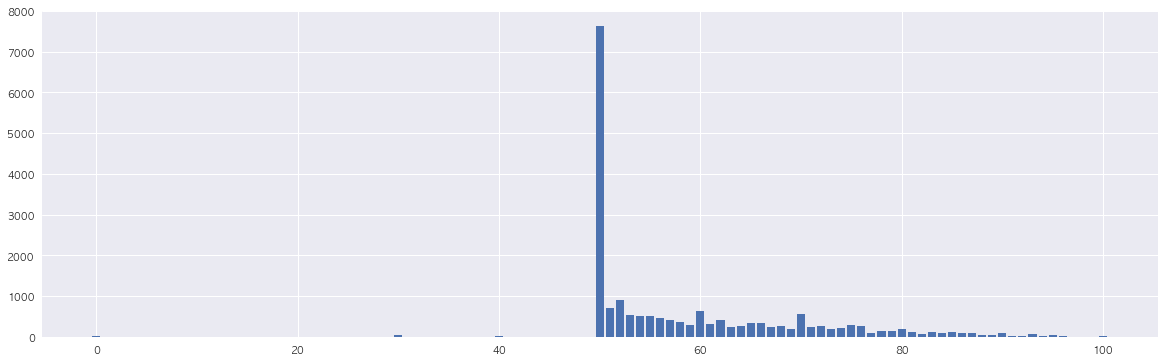

   USABLE_DATE_MON  Counts
0              0.0    1018
1              1.0   11166
2              2.0     224


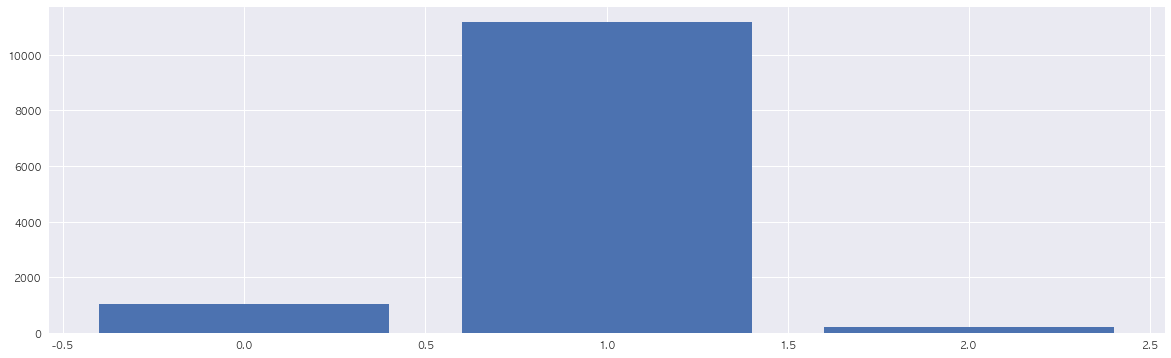

   USABLE_DATE_TUE  Counts
0              0.0     911
1              1.0   11158
2              2.0     339


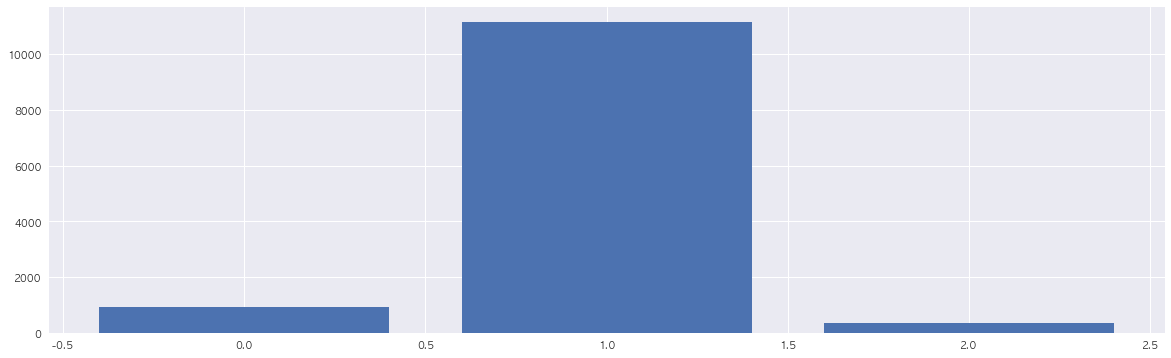

   USABLE_DATE_WED  Counts
0              0.0     406
1              1.0   11817
2              2.0     185


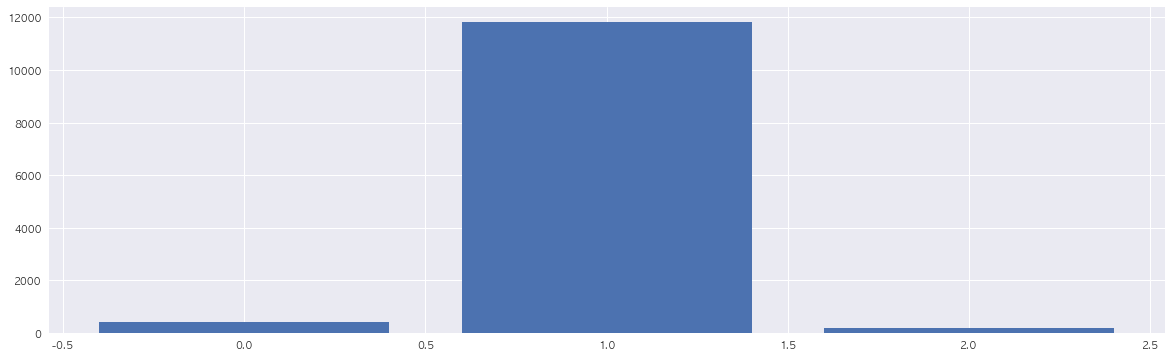

   USABLE_DATE_THU  Counts
0              0.0     358
1              1.0   11917
2              2.0     133


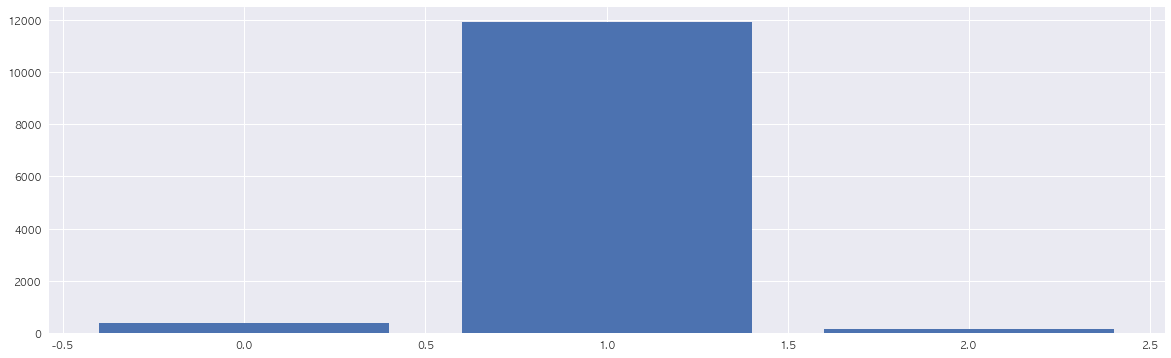

   USABLE_DATE_FRI  Counts
0              0.0     632
1              1.0   11141
2              2.0     635


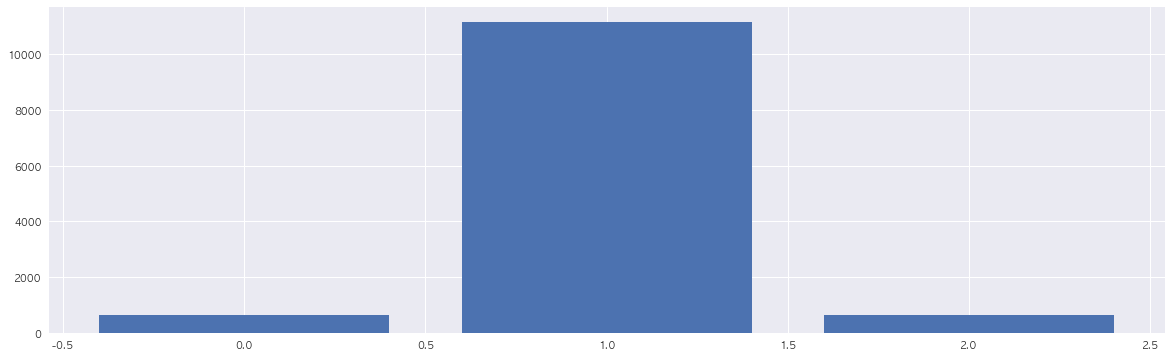

   USABLE_DATE_SAT  Counts
0              0.0    1577
1              1.0    8415
2              2.0    2416


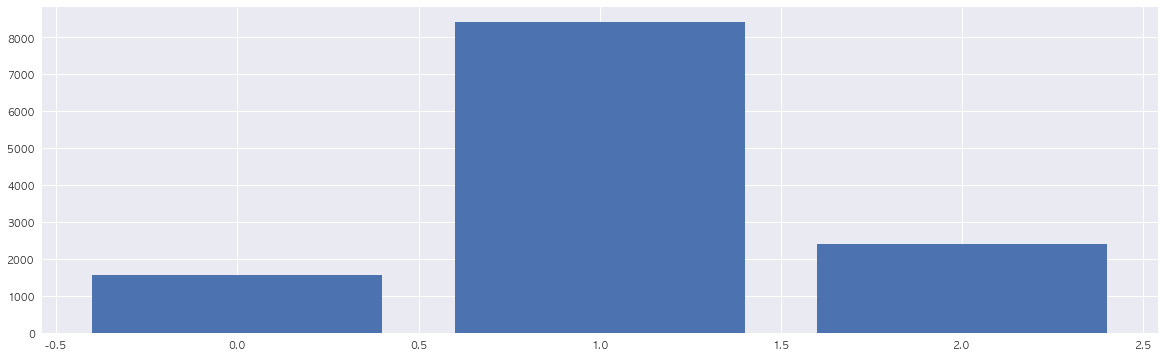

   USABLE_DATE_SUN  Counts
0              0.0    1642
1              1.0   10099
2              2.0     667


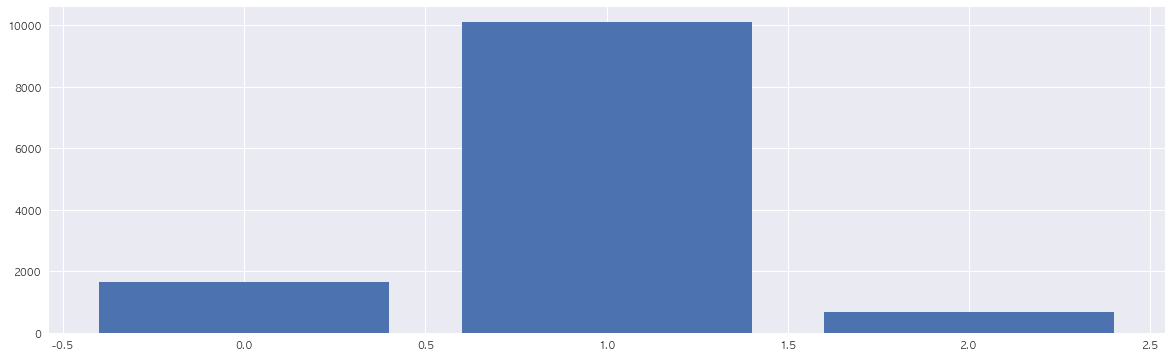

   USABLE_DATE_HOLIDAY  Counts
0                  0.0    1399
1                  1.0   10379
2                  2.0     630


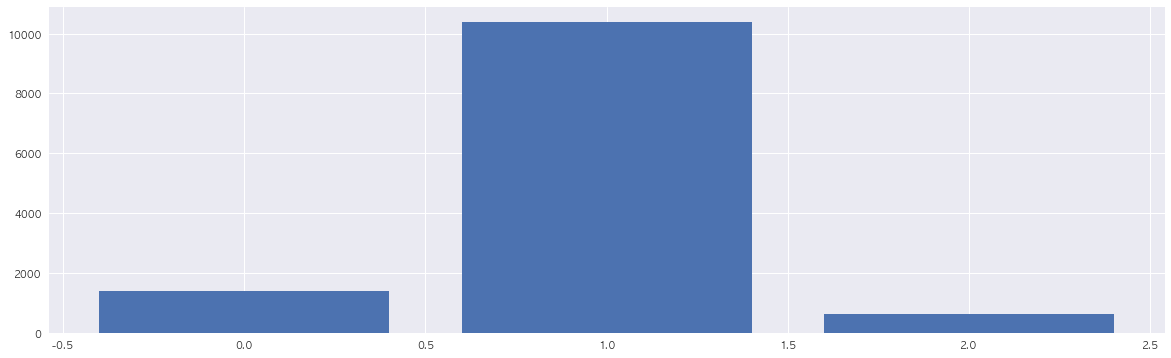

   USABLE_DATE_BEFORE_HOLIDAY  Counts
0                         0.0    1510
1                         1.0    8839
2                         2.0    2059


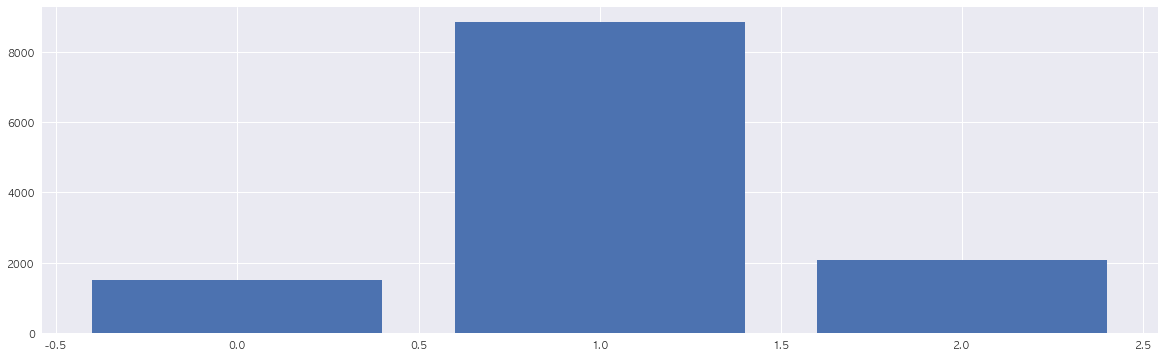

  large_area_name  Counts
0              中国     533
1           九州・沖縄    1660
2             北信越     758
3             北海道     850
4              四国     219
5              東北     582
6              東海    1733
7              関東    9503
8              関西    3575


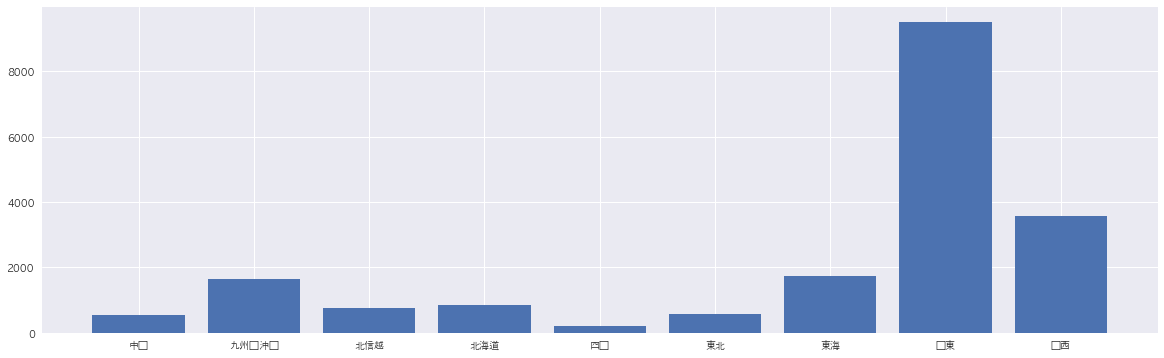

   ken_name  Counts
0       三重県     156
1       京都府     327
2       佐賀県      73
3       兵庫県     867
4       北海道     850
5       千葉県     459
6      和歌山県      49
7       埼玉県     595
8       大分県     155
9       大阪府    2189
10      奈良県      77
11      宮城県     261
12      宮崎県      77
13      富山県      62
14      山口県      64
15      山形県      68
16      山梨県     113
17      岐阜県     160
18      岡山県     199
19      岩手県      71
20      島根県      45
21      広島県     200
22      徳島県      37
23      愛媛県      87
24      愛知県     893
25      新潟県     133
26      東京都    6775
27      栃木県     143
28      沖縄県     229
29      滋賀県      66
30      熊本県     133
31      石川県      85
32     神奈川県    1379
33      福井県      61
34      福岡県     761
35      福島県      96
36      秋田県      35
37      群馬県     128
38      茨城県      24
39      長崎県     137
40      長野県     304
41      青森県      51
42      静岡県     524
43      香川県      70
44      高知県      25
45      鳥取県      25
46     鹿児島県      95


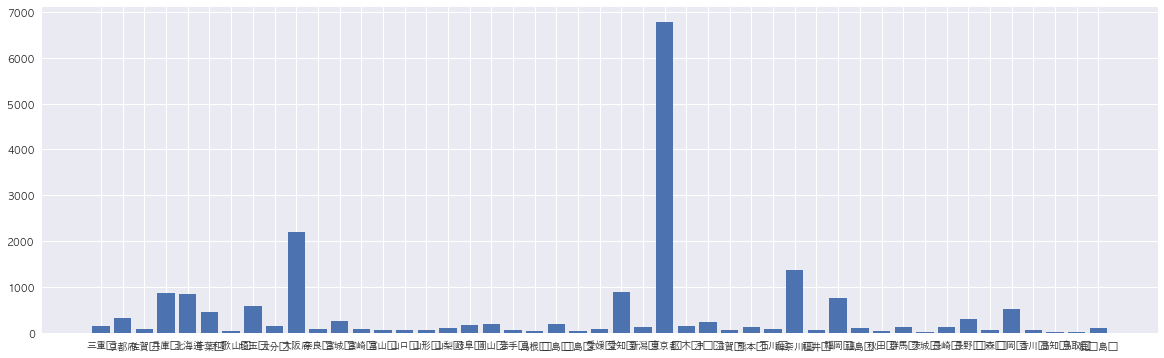

   small_area_name  Counts
0               キタ    1175
1             ミナミ他    1014
2               三重     156
3               京都     327
4               佐賀      73
5               兵庫     867
6              北海道     850
7               千葉     459
8              和歌山      49
9               埼玉     595
10              大分     155
11              奈良      77
12              宮城     261
13              宮崎      77
14              富山      62
15              山口      64
16              山形      68
17              山梨     113
18              岐阜     160
19              岡山     199
20              岩手      71
21              島根      45
22       川崎・湘南・箱根他     507
23              広島     200
24              徳島      37
25       恵比寿・目黒・品川     854
26              愛媛      87
27              愛知     893
28  新宿・高田馬場・中野・吉祥寺    1341
29              新潟     133
30              栃木     143
31              横浜     872
32       池袋・神楽坂・赤羽     689
33              沖縄     229
34      渋谷・青山・自由が丘     889
35              滋賀      66
3

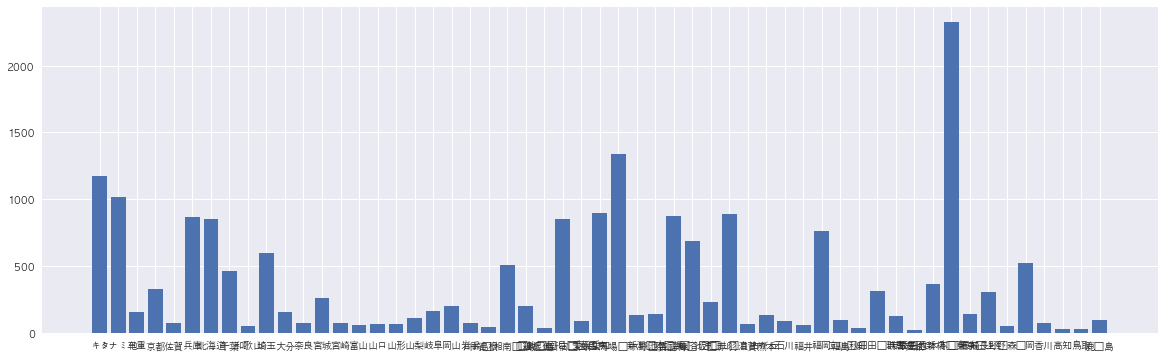

In [8]:
for col in col_name:
    show_bar(df_train_coupon_list_train, col)